In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving test2.jpeg to test2.jpeg


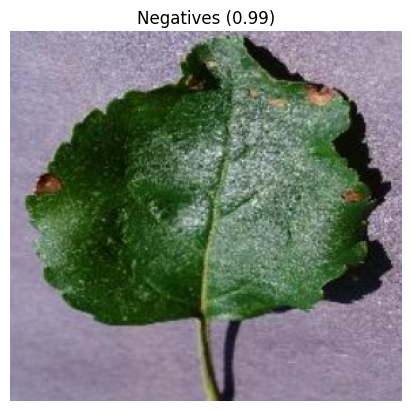

Predicted: Negatives
Confidence: 0.9908678531646729


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab import files
import matplotlib.pyplot as plt

BASE_PATH = "/content/drive/MyDrive/Chatbot"
MODEL_PATH = BASE_PATH + "/weedModel.h5"   # use best validation epoch

IMG_SIZE = (224, 224)

CLASS_NAMES = [
    'Chinee Apple','Lantana','Parkinsonia','Parthenium',
    'Prickly Acacia','Rubber Vine','Siam Weed',
    'Snake Weed','Negatives'
]

# Load model
model = load_model(MODEL_PATH)

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)

    # IMPORTANT: same preprocessing as training
    img_array = preprocess_input(img_array)

    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)
    class_index = np.argmax(prediction)
    confidence = float(np.max(prediction))

    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"{CLASS_NAMES[class_index]} ({confidence:.2f})")
    plt.show()

    print("Predicted:", CLASS_NAMES[class_index])
    print("Confidence:", confidence)

predict_image(img_path)
